## LSTM for predicting google stock prices

### Data preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
df_train=pd.read_csv(r"dataset\Google_Stock_Price_Train.csv")

In [5]:
training_set=df_train.iloc[:,1:2].values

In [6]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set_scaled=sc.fit_transform(training_set)

In [8]:
#creating a data structure with 60 timestamps and 1 output
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#reshaping to 3D tensor required for the rnn
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

### Building the LSTM

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [15]:
#Initializing the RNN
regressor=Sequential()

#adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))

#second LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))

#third LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))

#fourth LSTM layer
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(rate=0.2))

#adding the output layer
regressor.add(Dense(units=1))

In [16]:
#compiling the rnn
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#training the rnn
regressor.fit(x_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 125ms/step - loss: 0.0353
Epoch 2/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0065
Epoch 5/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0043
Epoch 13/100

### Evaluation

In [18]:
dataset_test=pd.read_csv(r"dataset\Google_Stock_Price_Test.csv")
real_stock_price=dataset_test.iloc[:,1:2].values

In [22]:
#prediction
#we need the previous 60 values from the training set
#axis=0 for horizontal concatenation
dataset_total = pd.concat((df_train['Open'],dataset_test['Open']),axis=0)

#the inputs contain the 60 previous values before Jan 2017 
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
    
x_test= np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
y_pred=regressor.predict(x_test)
#inverse the scaling
y_pred=sc.inverse_transform(y_pred)

1/1 [==============================] - 2s 2s/step


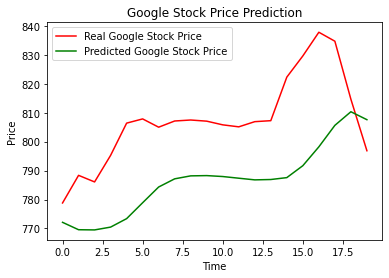

In [27]:
#visualisation of the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(y_pred, color='green', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()